# Handle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
tab = pd.read_csv("data_table.csv")
tab.drop_duplicates(subset = ['name','date'],keep = 'first',inplace=True)
tab.head()

,league,club,name_x,name,country_of_birth,date_of_birth,position,sub_position,foot,date,market_value,Apps,Mins,Goals,Assists,Yel,Red,MotM,Rating,age
0,EPL,Manchester City,riyad-mahrez,Riyad Mahrez,France,2/21/1991,Attack,attack - Right Winger,Left,2013,675000,19,1163,3,4,0,0,1,7.21,22
1,EPL,Manchester City,riyad-mahrez,Riyad Mahrez,France,2/21/1991,Attack,attack - Right Winger,Left,2014,1800000,31,2155,4,3,0,0,2,7.14,23
2,EPL,Manchester City,riyad-mahrez,Riyad Mahrez,France,2/21/1991,Attack,attack - Right Winger,Left,2015,6300000,41,3299,18,12,1,0,10,7.72,24
3,EPL,Manchester City,riyad-mahrez,Riyad Mahrez,France,2/21/1991,Attack,attack - Right Winger,Left,2016,27000000,45,3613,10,5,5,0,5,7.01,25
4,EPL,Manchester City,riyad-mahrez,Riyad Mahrez,France,2/21/1991,Attack,attack - Right Winger,Left,2017,27000000,36,2961,12,10,2,0,5,7.28,26


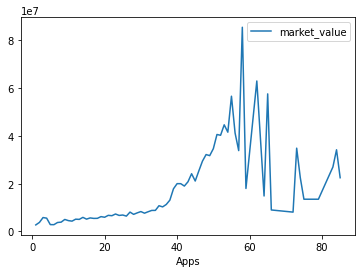

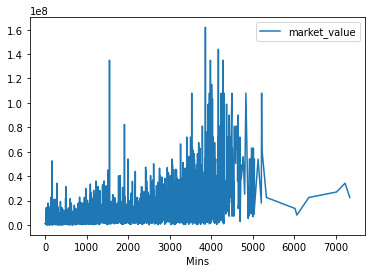

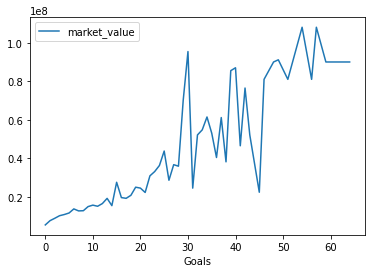

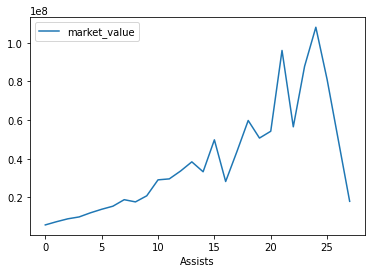

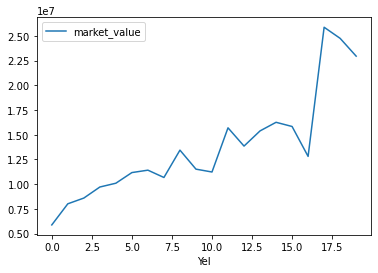

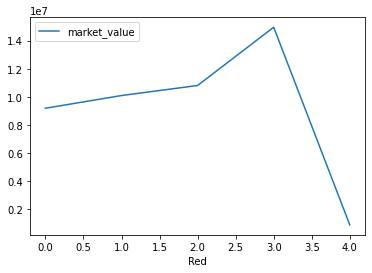

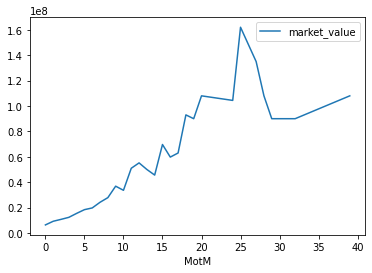

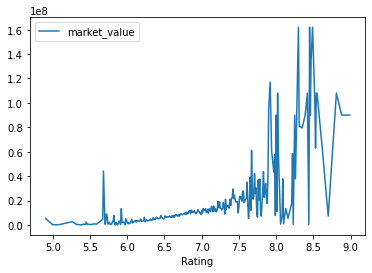

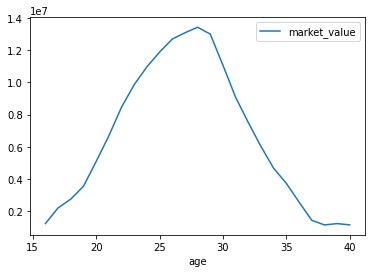

In [3]:
for i in range(11,len(list(tab))):
    tab.groupby(by = (list(tab))[i]).mean().plot(y = 'market_value')

In [4]:
reg = tab.iloc[:,-10:]
reg.head(10)

,market_value,Apps,Mins,Goals,Assists,Yel,Red,MotM,Rating,age
0,675000,19,1163,3,4,0,0,1,7.21,22
1,1800000,31,2155,4,3,0,0,2,7.14,23
2,6300000,41,3299,18,12,1,0,10,7.72,24
3,27000000,45,3613,10,5,5,0,5,7.01,25
4,27000000,36,2961,12,10,2,0,5,7.28,26
5,54000000,33,1727,8,8,1,0,4,7.03,27
6,54000000,47,3066,15,13,0,0,6,7.47,28
7,43200000,39,2767,13,8,0,0,7,7.30,29
8,37800000,45,2911,20,8,1,0,5,7.22,30
9,675000,20,1300,4,3,5,0,1,6.80,18


<AxesSubplot:>

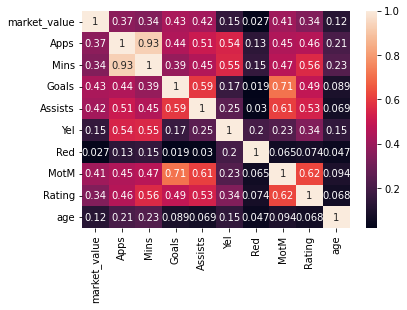

In [5]:
sns.heatmap(reg.corr(),annot = True)

In [6]:
reg['age'].describe()

count    13891.000000
mean        24.526312
std          4.017556
min         16.000000
25%         21.000000
50%         24.000000
75%         27.000000
max         40.000000
Name: age, dtype: float64

In [7]:
reg['fully_played'] = reg["Mins"]/(reg["Apps"]*90)
reg['GPM'] = reg["Goals"]/reg["Apps"]
reg['APM'] = reg["Assists"]/reg["Apps"]
reg['MPM'] = reg["MotM"]/reg["Apps"]
reg['Rpct'] = reg['Rating'].rank(pct=True)
reg['Acurve'] = 1 - (reg['age']-28)**2/50
reg['Gpct'] = reg['Goals'].rank(pct=True)
reg['Mpct'] = reg['MotM'].rank(pct=True)
reg['Apct'] = reg['Assists'].rank(pct=True)
reg['GPMpct'] = reg['GPM'].rank(pct=True)
reg['APMpct'] = reg['APM'].rank(pct=True)
reg['MPMpct'] = reg['MPM'].rank(pct=True)
reg.head()
#data = pd.concat((tab.iloc[:,6],reg.iloc[:,0:2],reg.iloc[:,-9:]),axis=1)
reg = pd.concat((tab.iloc[:,6],reg),axis = 1)
reg.head()
#data.head()

,position,market_value,Apps,Mins,Goals,Assists,Yel,Red,MotM,Rating,...,APM,MPM,Rpct,Acurve,Gpct,Mpct,Apct,GPMpct,APMpct,MPMpct
0,Attack,675000,19,1163,3,4,0,0,1,7.21,...,0.210526,0.052632,0.906702,0.28,0.708372,0.620078,0.823375,0.787704,0.930819,0.721546
1,Attack,1800000,31,2155,4,3,0,0,2,7.14,...,0.096774,0.064516,0.873551,0.50,0.766683,0.790044,0.751350,0.741487,0.721906,0.779210
2,Attack,6300000,41,3299,18,12,1,0,10,7.72,...,0.292683,0.243902,0.991073,0.68,0.977359,0.993269,0.985206,0.963754,0.975776,0.986934
3,Attack,27000000,45,3613,10,5,5,0,5,7.01,...,0.111111,0.111111,0.787200,0.82,0.920848,0.954107,0.872579,0.860197,0.763408,0.902923
4,Attack,27000000,36,2961,12,10,2,0,5,7.28,...,0.277778,0.138889,0.932654,0.92,0.943057,0.954107,0.974048,0.930063,0.971204,0.939637


<AxesSubplot:>

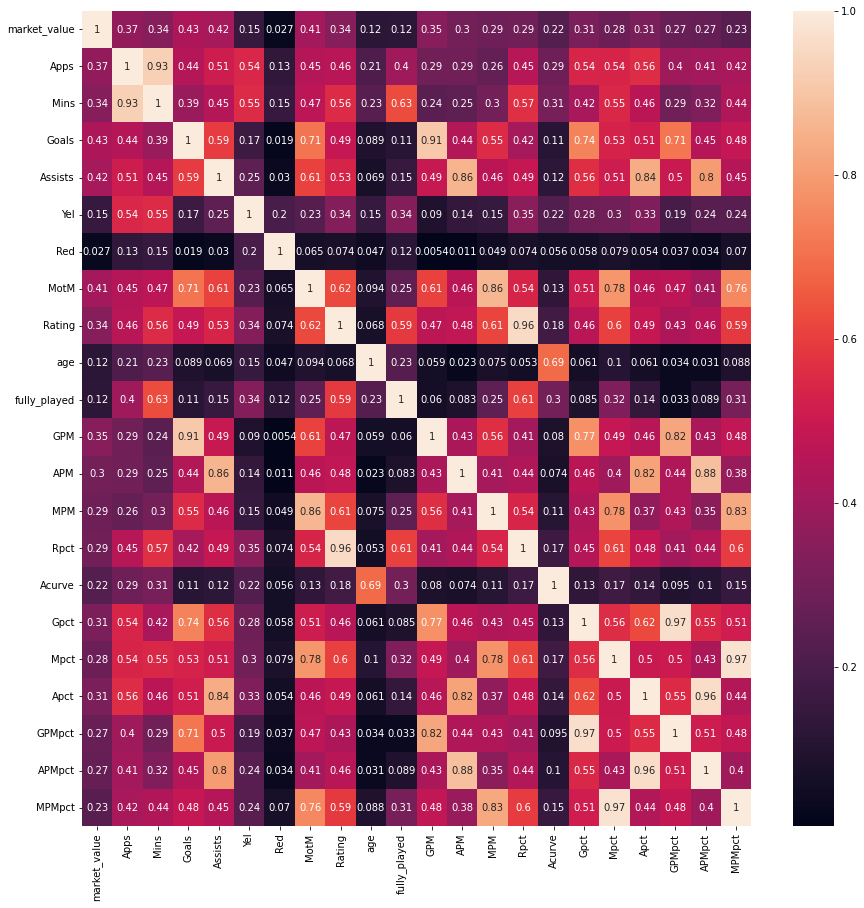

In [8]:
plt.figure(figsize = (15,15))
sns.heatmap(reg.corr(),annot = True)

In [9]:
reg = reg.drop(columns = ['Yel','Red','age','fully_played'])

<AxesSubplot:>

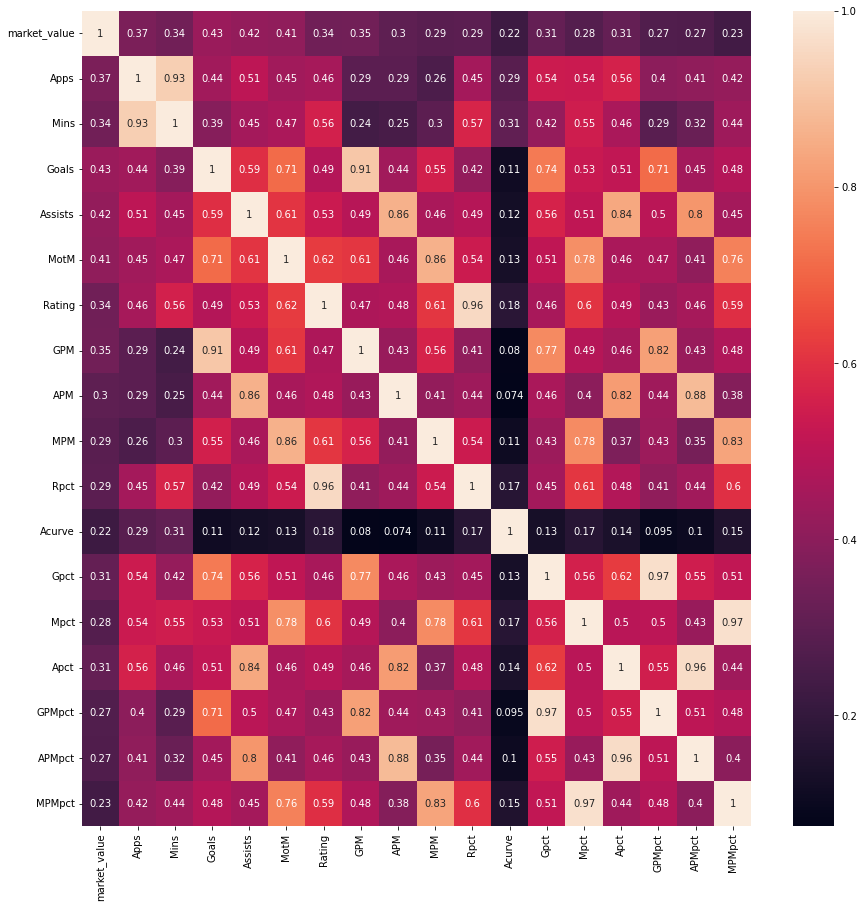

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(reg.corr(),annot = True)

In [11]:
len(tab['name'].unique())

2318

In [12]:
poslist = tab['position'].unique()
poslist

array(['Attack', 'Midfield', 'Defender', 'Goalkeeper'], dtype=object)

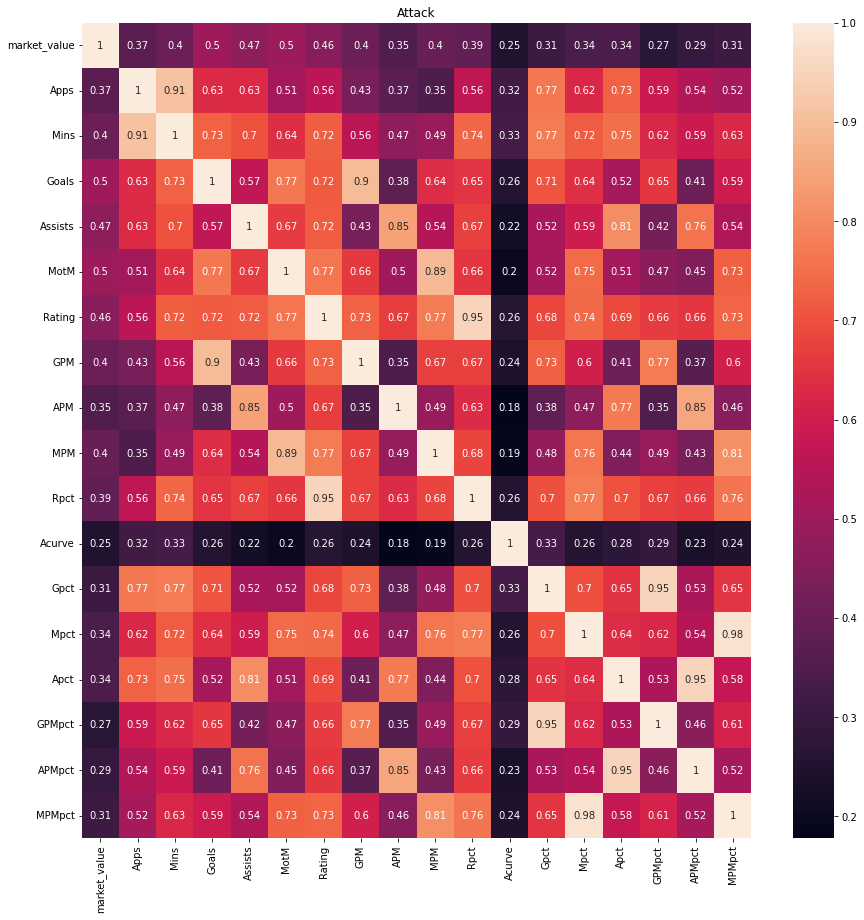

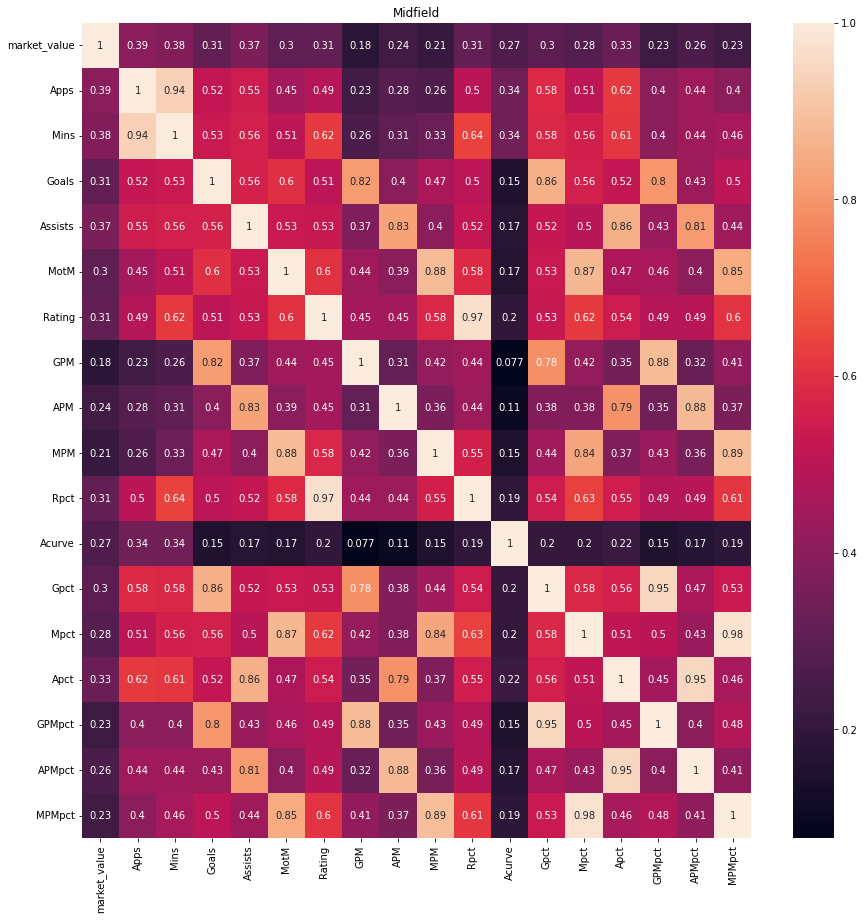

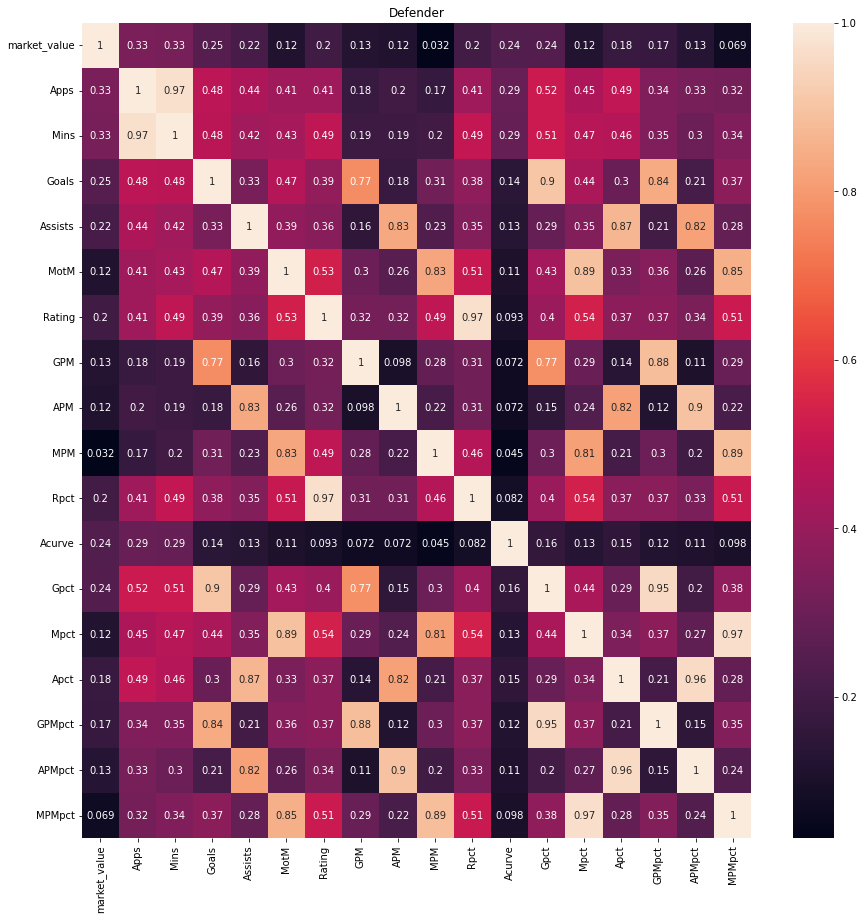

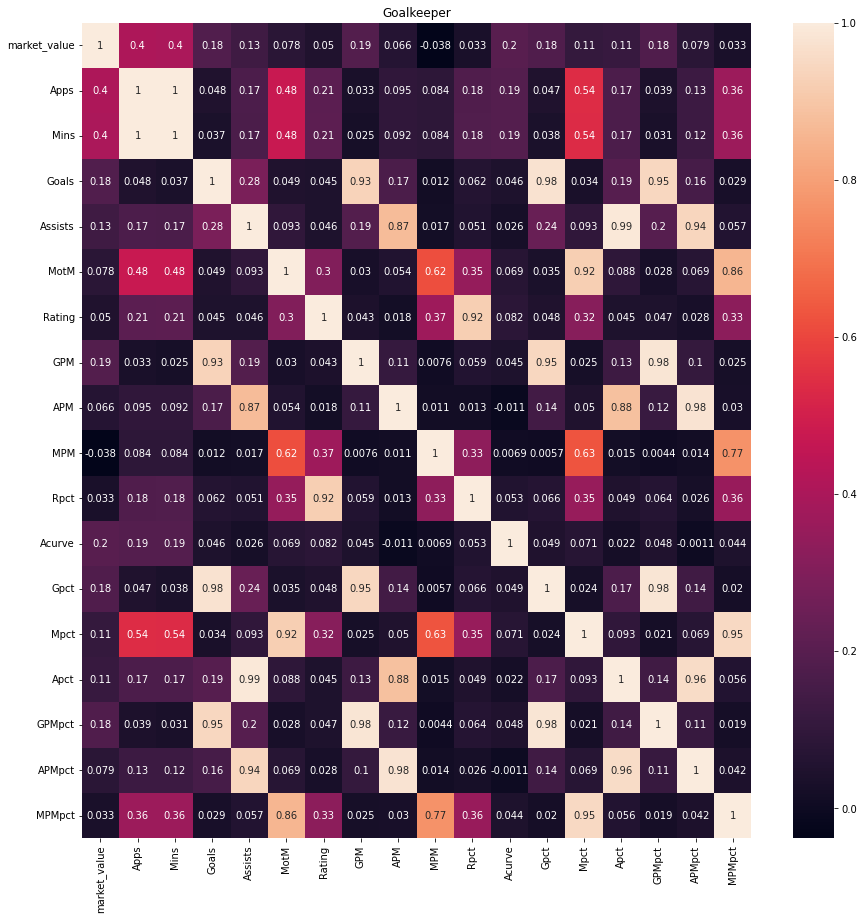

In [13]:
df = [0]*4
for i in range(4):
    df[i] = reg[reg['position']==poslist[i]]
    #df2[i] = df2[i].iloc[:,-10:]
    #df2[i] = pd.concat((df2[i].iloc[:,0:1],df2[i].iloc[:,-9:]),axis=1)
    f, ax = plt.subplots(figsize=(15, 15))
    plt.title(poslist[i])
    sns.heatmap(df[i].iloc[:,1:].corr(),annot = True)

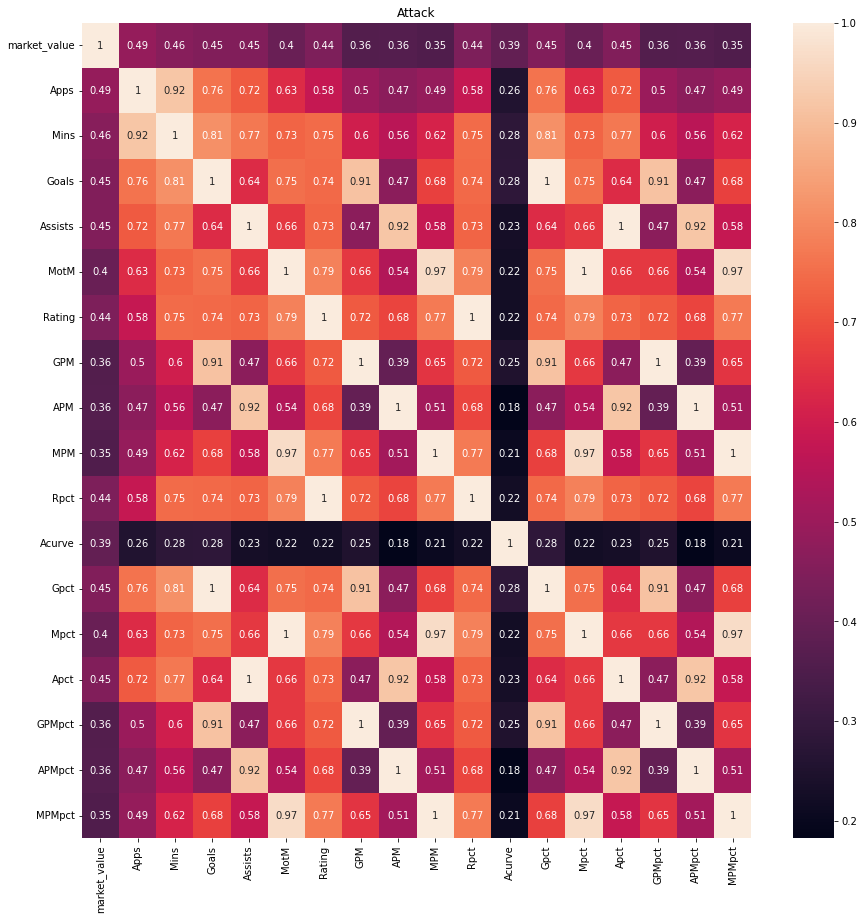

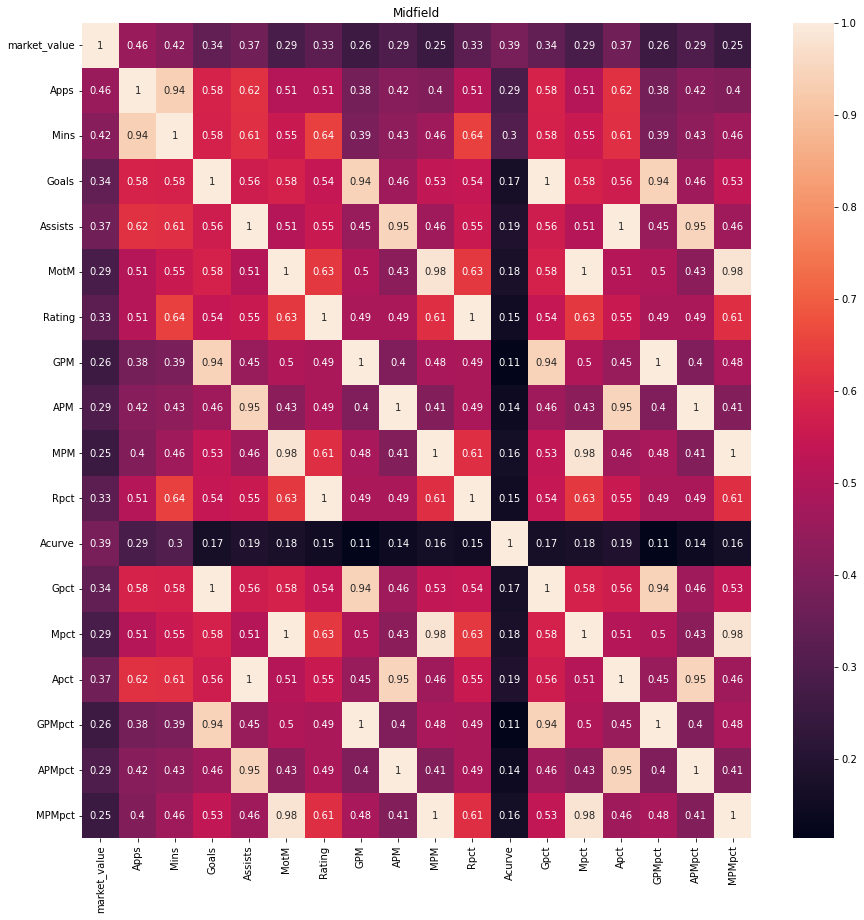

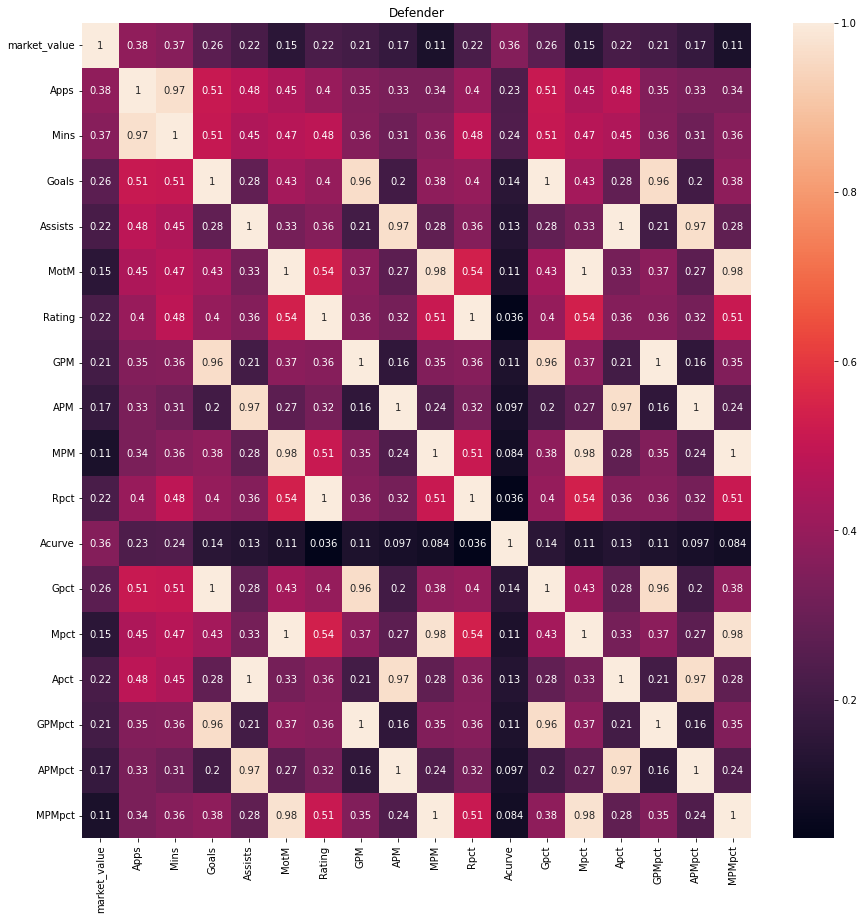

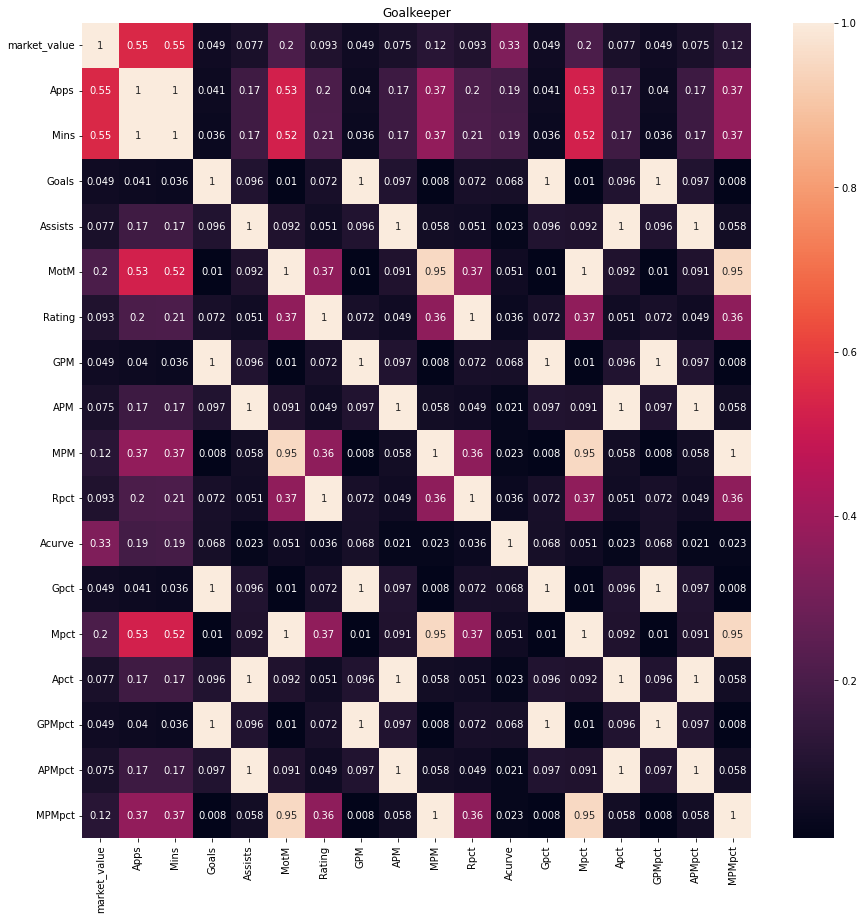

In [14]:
for i in range(4):
    #df2[i] = df2[i].iloc[:,-10:]
    #df2[i] = pd.concat((df2[i].iloc[:,0:1],df2[i].iloc[:,-9:]),axis=1)
    f, ax = plt.subplots(figsize=(15, 15))
    plt.title(poslist[i])
    sns.heatmap(df[i].iloc[:,1:].corr("spearman"),annot = True)

# Split into 4 different dataset

# Attack

In [15]:
attack = df[0]
corr_p = attack.corr()
corr_s = attack.corr("spearman")
target_p = abs(corr_p["market_value"])
target_s = abs(corr_s["market_value"])
atk_feat_p = target_p[target_p>= 0.4]
atk_feat_s = target_s[target_s>= 0.4]
print(atk_feat_p)
print(atk_feat_s)

market_value    1.000000
Mins            0.404816
Goals           0.502065
Assists         0.471872
MotM            0.498155
Rating          0.460174
GPM             0.402981
Name: market_value, dtype: float64
market_value    1.000000
Apps            0.486497
Mins            0.461248
Goals           0.449347
Assists         0.450340
MotM            0.403933
Rating          0.443790
Rpct            0.443790
Gpct            0.449347
Mpct            0.403933
Apct            0.450340
Name: market_value, dtype: float64


In [16]:
atk_p = attack[["market_value","Mins","Goals","Assists","MotM","Rating","GPM"]]
atk_p.head()

,market_value,Mins,Goals,Assists,MotM,Rating,GPM
0,675000,1163,3,4,1,7.21,0.157895
1,1800000,2155,4,3,2,7.14,0.129032
2,6300000,3299,18,12,10,7.72,0.439024
3,27000000,3613,10,5,5,7.01,0.222222
4,27000000,2961,12,10,5,7.28,0.333333


# LR

In [17]:
LR = linear_model.LinearRegression()
L = linear_model.Lasso()
R = linear_model.Ridge()
EL = linear_model.ElasticNet()

In [18]:
def get_error(y_true,y_pred):
    print(f'MAE: {mean_absolute_error(y_true,y_pred)}')
    print(f'RMSE: {mean_squared_error(y_true,y_pred,squared=False)}')
    print(f'R2: {r2_score(y_true,y_pred)}')

In [19]:
logcol = atk_p['market_value']
atk_p.loc[:,('market_value_log')] = np.log(logcol)

In [20]:
y = atk_p.iloc[:,-1]
X = atk_p.iloc[:,1:-1]

In [21]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 30)

## Tuning

## Lasso

In [23]:
regressor = L
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
          'max_iter': [10000,1000]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv= 5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'max_iter': [10000, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [24]:
grid.best_estimator_.get_params()

{'alpha': 0.007,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [25]:
L = linear_model.Lasso(alpha=0.007,max_iter=10000)

## Ridge

In [26]:
regressor = R
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
         'fit_intercept' : [True, False]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [27]:
grid.best_estimator_.get_params()

{'alpha': 50,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [28]:
R = linear_model.Ridge(alpha=50,fit_intercept=True)

## ElasticNet

In [29]:
regressor = EL
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
         'fit_intercept' : [True, False]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error', verbose=1)

In [30]:
grid.best_estimator_.get_params()

{'alpha': 0.007,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.9,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [31]:
EL = linear_model.ElasticNet(alpha=0.007,l1_ratio=0.9,fit_intercept=True)

# Eval

In [32]:
models = [LR,L,R,EL]

In [33]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model, end = ":\n")
    get_error(y_test,y_pred)

LinearRegression():
MAE: 1.0191269901470457
RMSE: 1.3037164940079362
R2: 0.2746275942240942
Lasso(alpha=0.007, max_iter=10000):
MAE: 1.0209097369034976
RMSE: 1.3054833965632242
R2: 0.27266009458794804
Ridge(alpha=50):
MAE: 1.0196166827905293
RMSE: 1.3045015238827753
R2: 0.2737537685806697
ElasticNet(alpha=0.007, l1_ratio=0.9):
MAE: 1.0208290494160075
RMSE: 1.3054428233655249
R2: 0.27270530396751613


In [34]:
mvps = set()
for i in range(4):
    name = "model_"+str(i)
    Y = models[i].predict(X)
    atk_p[name] = np.exp(Y).astype('int64')
    for player in tab.loc[atk_p[name].nlargest(n=30).index]['name'].unique():
        mvps.add(player)
mvps

{'Bruno Fernandes',
 'Cristiano Ronaldo',
 'Karim Benzema',
 'Kevin De Bruyne',
 'Kylian Mbappe',
 'Lionel Messi',
 'Luis Suarez',
 'Mohamed Salah',
 'Neymar',
 'Robert Lewandowski',
 'Thomas Muller',
 'Zlatan Ibrahimovic'}

In [35]:
realmvp = set()
realatk = tab.loc[tab['position']=="Attack"]
for player in  realatk.loc[realatk["market_value"].nlargest(n=30).index]['name'].unique():
    realmvp.add(player)
realmvp

{'Antoine Griezmann',
 'Cristiano Ronaldo',
 'Eden Hazard',
 'Erling Haaland',
 'Harry Kane',
 'Kevin De Bruyne',
 'Kylian Mbappe',
 'Lionel Messi',
 'Mohamed Salah',
 'Neymar',
 'Philippe Coutinho',
 'Raheem Sterling',
 'Sadio Mane'}

In conclusion, we can deduce many world-class players from the result, although the result is quite bad

In [36]:
atk_s = attack[["market_value","Apps","Mins","Goals","Assists","MotM","Rating","Rpct","Gpct","Mpct","Apct"]]
atk_s.head()

,market_value,Apps,Mins,Goals,Assists,MotM,Rating,Rpct,Gpct,Mpct,Apct
0,675000,19,1163,3,4,1,7.21,0.906702,0.708372,0.620078,0.823375
1,1800000,31,2155,4,3,2,7.14,0.873551,0.766683,0.790044,0.751350
2,6300000,41,3299,18,12,10,7.72,0.991073,0.977359,0.993269,0.985206
3,27000000,45,3613,10,5,5,7.01,0.787200,0.920848,0.954107,0.872579
4,27000000,36,2961,12,10,5,7.28,0.932654,0.943057,0.954107,0.974048


# LR

In [37]:
LR = linear_model.LinearRegression()
L = linear_model.Lasso()
R = linear_model.Ridge()
EL = linear_model.ElasticNet()

In [38]:
def get_error(y_true,y_pred):
    print(f'MAE: {mean_absolute_error(y_true,y_pred)}')
    print(f'RMSE: {mean_squared_error(y_true,y_pred,squared=False)}')
    print(f'R2: {r2_score(y_true,y_pred)}')

In [39]:
logcol = atk_s['market_value']
atk_s.loc[:,('market_value_log')] = np.log(logcol)

In [40]:
y = atk_s.iloc[:,-1]
X = atk_s.iloc[:,1:-1]

In [41]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 30)

## Tuning

## Lasso

In [43]:
regressor = L
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
          'max_iter': [10000,1000]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv= 5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'max_iter': [10000, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [44]:
grid.best_estimator_.get_params()

{'alpha': 0.0007,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [45]:
L = linear_model.Lasso(alpha=0.007,max_iter=10000)

## Ridge

In [46]:
regressor = R
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
         'fit_intercept' : [True, False]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [47]:
grid.best_estimator_.get_params()

{'alpha': 10,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [48]:
R = linear_model.Ridge(alpha=10,fit_intercept=True)

## ElasticNet

In [49]:
regressor = EL
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
         'fit_intercept' : [True, False]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error', verbose=1)

In [50]:
grid.best_estimator_.get_params()

{'alpha': 0.003,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.1,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [51]:
EL = linear_model.ElasticNet(alpha=0.003,l1_ratio=0.1,fit_intercept=True)

# Eval

In [52]:
models = [LR,L,R,EL]

In [53]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model, end = ":\n")
    get_error(y_test,y_pred)

LinearRegression():
MAE: 0.9834854683929498
RMSE: 1.260491901369807
R2: 0.32192953250198253
Lasso(alpha=0.007, max_iter=10000):
MAE: 0.9885425875843961
RMSE: 1.2645145362419432
R2: 0.3175947449840246
Ridge(alpha=10):
MAE: 0.9840208440999488
RMSE: 1.2611002605636896
R2: 0.32127485166062353
ElasticNet(alpha=0.003, l1_ratio=0.1):
MAE: 0.9841138290866847
RMSE: 1.2611110200583804
R2: 0.3212632700742718


In [54]:
mvps = set()
for i in range(4):
    name = "model_"+str(i)
    Y = models[i].predict(X)
    atk_s[name] = np.exp(Y).astype('int64')
    for player in tab.loc[atk_s[name].nlargest(n=30).index]['name'].unique():
        mvps.add(player)
mvps

{'Angel Di Maria',
 'Bruno Fernandes',
 'Cristiano Ronaldo',
 'Eden Hazard',
 'Karim Benzema',
 'Kevin De Bruyne',
 'Kylian Mbappe',
 'Lionel Messi',
 'Luis Suarez',
 'Mohamed Salah',
 'Neymar',
 'Robert Lewandowski',
 'Zlatan Ibrahimovic'}

In [55]:
realmvp = set()
realatk = tab.loc[tab['position']=="Attack"]
for player in  realatk.loc[realatk["market_value"].nlargest(n=30).index]['name'].unique():
    realmvp.add(player)
realmvp

{'Antoine Griezmann',
 'Cristiano Ronaldo',
 'Eden Hazard',
 'Erling Haaland',
 'Harry Kane',
 'Kevin De Bruyne',
 'Kylian Mbappe',
 'Lionel Messi',
 'Mohamed Salah',
 'Neymar',
 'Philippe Coutinho',
 'Raheem Sterling',
 'Sadio Mane'}

It seems like Spearman score is better => We will apply it to the rest

# Midfield

In [56]:
midfield = df[1]
corr_s = midfield.corr("spearman")
target_s = abs(corr_s["market_value"])
mf_feat_s = target_s[target_s>= 0.3]
print(mf_feat_s)

market_value    1.000000
Apps            0.455846
Mins            0.415216
Goals           0.336529
Assists         0.369234
Rating          0.326035
Rpct            0.326035
Acurve          0.385782
Gpct            0.336529
Apct            0.369234
Name: market_value, dtype: float64


In [57]:
mf_s = midfield[["market_value","Apps","Mins","Goals","Assists","Rating","Rpct","Acurve","Gpct","Apct"]]
mf_s.head()

,market_value,Apps,Mins,Goals,Assists,Rating,Rpct,Acurve,Gpct,Apct
43,630000,22,1615,1,2,6.73,0.484270,-0.62,0.483191,0.647578
44,3150000,25,1833,5,2,6.86,0.642358,-0.28,0.809985,0.647578
45,5850000,30,2066,3,3,7.49,0.975056,0.02,0.708372,0.751350
46,8100000,40,3111,4,3,7.27,0.929163,0.28,0.766683,0.751350
47,24300000,1,57,0,0,6.74,0.495681,0.50,0.198438,0.200813


# LR

In [58]:
LR = linear_model.LinearRegression()
L = linear_model.Lasso()
R = linear_model.Ridge()
EL = linear_model.ElasticNet()

In [59]:
def get_error(y_true,y_pred):
    print(f'MAE: {mean_absolute_error(y_true,y_pred)}')
    print(f'RMSE: {mean_squared_error(y_true,y_pred,squared=False)}')
    print(f'R2: {r2_score(y_true,y_pred)}')

In [60]:
logcol = mf_s['market_value']
mf_s.loc[:,('market_value_log')] = np.log(logcol)

In [61]:
y = mf_s.iloc[:,-1]
X = mf_s.iloc[:,1:-1]

In [62]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 30)

## Tuning

## Lasso

In [64]:
regressor = L
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
          'max_iter': [10000,1000]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv= 5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'max_iter': [10000, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [65]:
grid.best_estimator_.get_params()

{'alpha': 0.002,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [66]:
L = linear_model.Lasso(alpha=0.0002,max_iter=10000)

## Ridge

In [67]:
regressor = R
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
         'fit_intercept' : [True, False]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [68]:
grid.best_estimator_.get_params()

{'alpha': 7,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [69]:
R = linear_model.Ridge(alpha=7,fit_intercept=True)

## ElasticNet

In [70]:
regressor = EL
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
         'fit_intercept' : [True, False]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error', verbose=1)

In [71]:
grid.best_estimator_.get_params()

{'alpha': 0.002,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.9,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [72]:
EL = linear_model.ElasticNet(alpha=0.002,l1_ratio=0.9,fit_intercept=True)

# Eval

In [73]:
models = [LR,L,R,EL]

In [74]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model, end = ":\n")
    get_error(y_test,y_pred)

LinearRegression():
MAE: 0.9951318665314184
RMSE: 1.2347165805169686
R2: 0.31480920469424367
Lasso(alpha=0.0002, max_iter=10000):
MAE: 0.9950336641211344
RMSE: 1.234620003732983
R2: 0.3149163887014863
Ridge(alpha=7):
MAE: 0.9951275103275387
RMSE: 1.2345615454381573
R2: 0.31498126351554767
ElasticNet(alpha=0.002, l1_ratio=0.9):
MAE: 0.994288803666056
RMSE: 1.233955427525851
R2: 0.31565372930645474


In [75]:
mvps = set()
for i in range(4):
    name = "model_"+str(i)
    Y = models[i].predict(X)
    mf_s[name] = np.exp(Y).astype('int64')
    for player in tab.loc[mf_s[name].nlargest(n=30).index]['name'].unique():
        mvps.add(player)
mvps

{'Arturo Vidal',
 'Benjamin Bourigeaud',
 'Cesc Fabregas',
 'Filip Kostic',
 'Hakan Calhanoglu',
 'Ivan Perisic',
 'Ivan Rakitic',
 'James Milner',
 'Joshua Kimmich',
 'Luis Alberto',
 'Marcos Llorente',
 'Paul Pogba',
 'Przemyslaw Frankowski',
 'Rodri',
 'Sergio Oliveira',
 'Teji Savanier',
 'Thiago',
 'Toni Kroos'}

In [76]:
realmvp = set()
realmf = tab.loc[tab['position']=="Midfield"]
for player in  realmf.loc[realmf["market_value"].nlargest(n=30).index]['name'].unique():
    realmvp.add(player)
realmvp

{'Arthur',
 'Casemiro',
 'Declan Rice',
 'Frenkie De Jong',
 'Joshua Kimmich',
 'Koke',
 'Marco Verratti',
 'Marcos Llorente',
 'Paul Pogba',
 'Pedri',
 'Phil Foden',
 'Rodri',
 'Saul Niguez',
 'Sergio Busquets',
 'Thiago',
 'Toni Kroos'}

MF having less accurate guesses

# Defender

In [77]:
defender = df[2]
corr_s = defender.corr("spearman")
target_s = abs(corr_s["market_value"])
df_feat_s = target_s[target_s>= 0.25]
print(df_feat_s)

market_value    1.000000
Apps            0.383881
Mins            0.365022
Goals           0.263890
Acurve          0.359712
Gpct            0.263890
Name: market_value, dtype: float64


In [78]:
df_s = defender[["market_value","Apps","Mins","Goals","Acurve","Gpct"]]
df_s.head()

,market_value,Apps,Mins,Goals,Acurve,Gpct
79,45000,2,180,0,-0.62,0.198438
80,1800000,16,1341,1,-0.28,0.483191
81,4950000,37,3231,2,0.02,0.622021
82,14400000,47,4212,0,0.28,0.198438
83,15300000,29,2554,1,0.50,0.483191


# LR

In [79]:
LR = linear_model.LinearRegression()
L = linear_model.Lasso()
R = linear_model.Ridge()
EL = linear_model.ElasticNet()

In [80]:
def get_error(y_true,y_pred):
    print(f'MAE: {mean_absolute_error(y_true,y_pred)}')
    print(f'RMSE: {mean_squared_error(y_true,y_pred,squared=False)}')
    print(f'R2: {r2_score(y_true,y_pred)}')

In [81]:
logcol = df_s['market_value']
df_s.loc[:,('market_value_log')] = np.log(logcol)

In [82]:
y = df_s.iloc[:,-1]
X = df_s.iloc[:,1:-1]

In [83]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 30)

## Tuning

## Lasso

In [85]:
regressor = L
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
          'max_iter': [10000,1000]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv= 5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'max_iter': [10000, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [86]:
grid.best_estimator_.get_params()

{'alpha': 0.005,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [87]:
L = linear_model.Lasso(alpha=0.005,max_iter=10000)

## Ridge

In [88]:
regressor = R
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
         'fit_intercept' : [True, False]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [89]:
grid.best_estimator_.get_params()

{'alpha': 20,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [90]:
R = linear_model.Ridge(alpha=20,fit_intercept=True)

## ElasticNet

In [91]:
regressor = EL
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
         'fit_intercept' : [True, False]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error', verbose=1)

In [92]:
grid.best_estimator_.get_params()

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.3,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [93]:
EL = linear_model.ElasticNet(alpha=0.01,l1_ratio=0.3,fit_intercept=True)

# Eval

In [94]:
models = [LR,L,R,EL]

In [95]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model, end = ":\n")
    get_error(y_test,y_pred)

LinearRegression():
MAE: 1.0089314707700023
RMSE: 1.2319193469848444
R2: 0.296277210246812
Lasso(alpha=0.005, max_iter=10000):
MAE: 1.0119316685591933
RMSE: 1.2336415866282413
R2: 0.2943082072093488
Ridge(alpha=20):
MAE: 1.009626355462079
RMSE: 1.2322879605171269
R2: 0.2958560129454406
ElasticNet(alpha=0.01, l1_ratio=0.3):
MAE: 1.01145507153684
RMSE: 1.2333698568177731
R2: 0.2946190533745786


In [96]:
mvps = set()
for i in range(4):
    name = "model_"+str(i)
    Y = models[i].predict(X)
    df_s[name] = np.exp(Y).astype('int64')
    for player in tab.loc[df_s[name].nlargest(n=30).index]['name'].unique():
        mvps.add(player)
mvps

{'Amir Rrahmani',
 'Andrew Robertson',
 'Antonio Rudiger',
 'Aymeric Laporte',
 'Berat Djimsiti',
 'Connor Roberts',
 'Dani Alves',
 'Gerard Pique',
 'Giorgio Chiellini',
 'Giovanni Di Lorenzo',
 'Harry Maguire',
 'Jesus Navas',
 'Jordi Alba',
 'Kyle Walker',
 'Lucas Vazquez',
 'Marcelo',
 'Matt Doherty',
 'Matt Ritchie',
 'Matthias Ginter',
 'Milan Skriniar',
 'Raphael Guerreiro',
 'Sergio Ramos',
 'Stefan Lainer',
 'Stuart Dallas',
 'Virgil Van Dijk'}

In [97]:
realmvp = set()
realdf = tab.loc[tab['position']=="Defender"]
for player in  realdf.loc[realdf["market_value"].nlargest(n=30).index]['name'].unique():
    realmvp.add(player)
realmvp

{'Alphonso Davies',
 'Andrew Robertson',
 'Aymeric Laporte',
 'David Alaba',
 'John Stones',
 'Kalidou Koulibaly',
 'Lucas Hernandez',
 'Marquinhos',
 'Matthijs De Ligt',
 'Raphael Varane',
 'Ruben Dias',
 'Samuel Umtiti',
 'Stefan De Vrij',
 'Trent Alexander Arnold',
 'Virgil Van Dijk'}

# GK

In [98]:
goalkeeper = df[3]
corr_s = goalkeeper.corr("spearman")
target_s = abs(corr_s["market_value"])
gk_feat_s = target_s[target_s>= 0.2]
print(gk_feat_s)

market_value    1.000000
Apps            0.548619
Mins            0.548564
MotM            0.203506
Acurve          0.327996
Mpct            0.203506
Name: market_value, dtype: float64


In [99]:
gk_s = goalkeeper[["market_value","Apps","Mins","MotM","Acurve","Mpct"]]
gk_s.head()

,market_value,Apps,Mins,MotM,Acurve,Mpct
149,450000,39,3540,2,0.28,0.790044
150,1800000,32,2910,1,0.50,0.620078
151,4500000,30,2700,2,0.68,0.790044
152,5400000,2,180,0,0.82,0.253689
153,5400000,4,391,0,0.92,0.253689


# LR

In [100]:
LR = linear_model.LinearRegression()
L = linear_model.Lasso()
R = linear_model.Ridge()
EL = linear_model.ElasticNet()

In [101]:
def get_error(y_true,y_pred):
    print(f'MAE: {mean_absolute_error(y_true,y_pred)}')
    print(f'RMSE: {mean_squared_error(y_true,y_pred,squared=False)}')
    print(f'R2: {r2_score(y_true,y_pred)}')

In [102]:
logcol = gk_s['market_value']
gk_s.loc[:,('market_value_log')] = np.log(logcol)

In [103]:
y = gk_s.iloc[:,-1]
X = gk_s.iloc[:,1:-1]
X

,Apps,Mins,MotM,Acurve,Mpct
149,39,3540,2,0.28,0.790044
150,32,2910,1,0.50,0.620078
151,30,2700,2,0.68,0.790044
152,2,180,0,0.82,0.253689
153,4,391,0,0.92,0.253689
...,...,...,...,...,...
13880,12,1080,0,1.00,0.253689
13881,1,90,0,0.02,0.253689
13882,1,90,0,0.28,0.253689
13883,2,180,0,0.50,0.253689


In [104]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 30)

## Tuning

## Lasso

In [106]:
regressor = L
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
          'max_iter': [100000]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv= 5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'max_iter': [100000]},
             scoring='neg_mean_squared_error', verbose=1)

In [107]:
grid.best_estimator_.get_params()

{'alpha': 0.005,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 100000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [108]:
L = linear_model.Lasso(alpha=0.005,max_iter=100000)

## Ridge

In [109]:
regressor = R
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
         'fit_intercept' : [True, False]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [110]:
grid.best_estimator_.get_params()

{'alpha': 20,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [111]:
R = linear_model.Ridge(alpha=20,fit_intercept=True)

## ElasticNet

In [112]:
regressor = EL
params = {'alpha':[0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
          'max_iter':[10000],
         'fit_intercept' : [True, False]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 828 candidates, totalling 4140 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.002, 0.003, 0.005, 0.007, 0.009,
                                   0.01, 0.02, 0.03, 0.05, 0.07, 0.08, 0.09,
                                   0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1, 1.1, 1.2,
                                   1.3, 1.5, 1.7, 1.9, 2, 2.5, 3, 4, ...],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9],
                         'max_iter': [10000]},
             scoring='neg_mean_squared_error', verbose=1)

In [113]:
grid.best_estimator_.get_params()

{'alpha': 0.02,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.1,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [114]:
EL = linear_model.ElasticNet(alpha=0.02,l1_ratio=0.1,max_iter=10000,fit_intercept=True)

# Eval

In [115]:
models = [LR,L,R,EL]

In [116]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model, end = ":\n")
    get_error(y_test,y_pred)

LinearRegression():
MAE: 0.9599801825210853
RMSE: 1.211238935305905
R2: 0.3573333996906308
Lasso(alpha=0.005, max_iter=100000):
MAE: 0.9599576363140058
RMSE: 1.2101744799701875
R2: 0.3584624738600878
Ridge(alpha=20):
MAE: 0.9598772139447874
RMSE: 1.2093148904928372
R2: 0.35937352109287735
ElasticNet(alpha=0.02, l1_ratio=0.1, max_iter=10000):
MAE: 0.9598922101724724
RMSE: 1.2093341839291982
R2: 0.35935307979194897


In [117]:
mvps = set()
for i in range(4):
    name = "model_"+str(i)
    Y = models[i].predict(X)
    gk_s[name] = np.exp(Y).astype('int64')
    for player in tab.loc[gk_s[name].nlargest(n=30).index]['name'].unique():
        mvps.add(player)
mvps

{'Alisson',
 'Anthony Lopes',
 'Bernd Leno',
 'David De Gea',
 'Edouard Mendy',
 'Hugo Lloris',
 'Jan Oblak',
 'John Ruddy',
 'Manuel Neuer',
 'Marc Andre Ter Stegen',
 'Neto',
 'Peter Gulacsi',
 'Rui Patricio',
 'Salvatore Sirigu',
 'Steve Mandanda',
 'Thibaut Courtois',
 'Tim Krul'}

In [118]:
realmvp = set()
realgk = tab.loc[tab['position']=="Goalkeeper"]
for player in  realgk.loc[realgk["market_value"].nlargest(n=30).index]['name'].unique():
    realmvp.add(player)
realmvp

{'Alisson',
 'David De Gea',
 'Ederson',
 'Gianluigi Donnarumma',
 'Jan Oblak',
 'Kepa Arrizabalaga',
 'Manuel Neuer',
 'Marc Andre Ter Stegen',
 'Thibaut Courtois'}

# All players

In [119]:
allpl = reg
corr_s = allpl.corr("spearman")
target_s = abs(corr_s["market_value"])
all_feat_s = target_s[target_s>= 0.35]
print(all_feat_s)

market_value    1.000000
Apps            0.458150
Mins            0.405951
Goals           0.350354
Assists         0.350583
Acurve          0.354308
Gpct            0.350354
Apct            0.350583
Name: market_value, dtype: float64


In [120]:
all_s = attack[["market_value","Apps","Mins","Goals","Assists","Acurve","Gpct","Apct"]]
all_s.head()

,market_value,Apps,Mins,Goals,Assists,Acurve,Gpct,Apct
0,675000,19,1163,3,4,0.28,0.708372,0.823375
1,1800000,31,2155,4,3,0.50,0.766683,0.751350
2,6300000,41,3299,18,12,0.68,0.977359,0.985206
3,27000000,45,3613,10,5,0.82,0.920848,0.872579
4,27000000,36,2961,12,10,0.92,0.943057,0.974048


# LR

In [121]:
LR = linear_model.LinearRegression()
L = linear_model.Lasso()
R = linear_model.Ridge()
EL = linear_model.ElasticNet()

In [122]:
def get_error(y_true,y_pred):
    print(f'MAE: {mean_absolute_error(y_true,y_pred)}')
    print(f'RMSE: {mean_squared_error(y_true,y_pred,squared=False)}')
    print(f'R2: {r2_score(y_true,y_pred)}')

In [123]:
logcol = all_s['market_value']
all_s.loc[:,('market_value_log')] = np.log(logcol)

In [124]:
y = all_s.iloc[:,-1]
X = all_s.iloc[:,1:-1]

In [125]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 30)

## Tuning

## Lasso

In [127]:
regressor = L
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
          'max_iter': [10000,1000]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv= 5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'max_iter': [10000, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [128]:
grid.best_estimator_.get_params()

{'alpha': 0.003,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [129]:
L = linear_model.Lasso(alpha=0.003,max_iter=10000)

## Ridge

In [130]:
regressor = R
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
         'fit_intercept' : [True, False]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [131]:
grid.best_estimator_.get_params()

{'alpha': 10,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [132]:
R = linear_model.Ridge(alpha=10,fit_intercept=True)

## ElasticNet

In [133]:
regressor = EL
params = {'alpha':[0.00001,0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.0009,0.001,0.002,0.003,0.005,0.007,0.009
                   ,0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.2,0.4,0.5,0.7,0.9,1,
                   1.1,1.2,1.3,1.5,1.7,1.9,2,2.5,3,4,5,7,10,20,30,50,100,200,300,500,1000,2000,5000,6000,7000,10000],
          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
         'fit_intercept' : [True, False]}
scoring_fnc = 'neg_mean_squared_error'
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring= scoring_fnc, cv=5 , verbose= 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.002, 0.003, 0.005,
                                   0.007, 0.009, 0.01, 0.02, 0.03, 0.05, 0.07,
                                   0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   1.1, 1.2, ...],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error', verbose=1)

In [134]:
grid.best_estimator_.get_params()

{'alpha': 0.005,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.9,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [135]:
EL = linear_model.ElasticNet(alpha=0.005,l1_ratio=0.9,fit_intercept=True)

# Eval

In [136]:
models = [LR,L,R,EL]

In [137]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model, end = ":\n")
    get_error(y_test,y_pred)

LinearRegression():
MAE: 0.9264528706661671
RMSE: 1.1759525145556546
R2: 0.4098338713280869
Lasso(alpha=0.003, max_iter=10000):
MAE: 0.9275405160144652
RMSE: 1.177493461791438
R2: 0.40828617158019953
Ridge(alpha=10):
MAE: 0.9267476971610072
RMSE: 1.1764548717380376
R2: 0.409329535454779
ElasticNet(alpha=0.005, l1_ratio=0.9):
MAE: 0.9282805041552742
RMSE: 1.1784700024410368
R2: 0.4073043024920896


In [138]:
mvps = set()
for i in range(4):
    name = "model_"+str(i)
    Y = models[i].predict(X)
    all_s[name] = np.exp(Y).astype('int64')
    for player in tab.loc[all_s[name].nlargest(n=30).index]['name'].unique():
        mvps.add(player)
mvps

{'Angel Di Maria',
 'Bruno Fernandes',
 'Cristiano Ronaldo',
 'Dries Mertens',
 'Eden Hazard',
 'Gerard Moreno',
 'Harry Kane',
 'Kevin De Bruyne',
 'Kylian Mbappe',
 'Lionel Messi',
 'Luis Suarez',
 'Mohamed Salah',
 'Thomas Muller'}

In [139]:
realmvp = set()
for player in tab.loc[tab["market_value"].nlargest(n=30).index]['name'].unique():
    realmvp.add(player)
realmvp

{'Antoine Griezmann',
 'Cristiano Ronaldo',
 'Eden Hazard',
 'Erling Haaland',
 'Harry Kane',
 'Kevin De Bruyne',
 'Kylian Mbappe',
 'Lionel Messi',
 'Mohamed Salah',
 'Neymar',
 'Philippe Coutinho',
 'Raheem Sterling',
 'Sadio Mane'}